# ACGT content in modalities

In [1]:
%load_ext autoreload
%autoreload 2

import anchor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline



import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'


study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-02-21 16:15:55	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-02-21 16:15:55	Parsing datapackage to create a Study object
2016-02-21 16:16:30	Initializing Study
2016-02-21 16:16:30	Initializing Predictor configuration manager for Study
2016-02-21 16:16:30	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-21 16:16:30	Added ExtraTreesClassifier to default predictors
2016-02-21 16:16:30	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-21 16:16:30	Added ExtraTreesRegressor to default predictors
2016-02-21 16:16:30	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-21 16:16:30	Added GradientBoostingClassifier to default predictors
2016-02-21 16:16:30	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'
figure_folder = '{}/nucleotide_content'.format(folder)
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/nucleotide_content': File exists


In [3]:
csv_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper'

In [4]:
ls $csv_folder

conservation/
constitutive_downstream400_pyrimidine_content.csv
constitutive_exons.bed
constitutive_feature_data.csv
constitutive_upstream400_pyrimidine_content.csv
exon2_downstream400_pyrimidine_content.csv
exon2_upstream400_pyrimidine_content.csv
expression.csv
expression_stressed.csv
junction_exon_triples.csv
mapping_stats.csv
mapping_stats_stressed.csv
metadata.csv
metadata_stressed.csv
mutually_exclusive_exon_consolidated_events.csv
mutually_exclusive_exons_psi.csv
mxe_events_with_stressed.csv
nucleotide_content/
outrigger_singlecell.sh
outrigger_singlecell.sh.err
outrigger_singlecell.sh.out
outrigger_singlecell.sh~
psi.csv
psi3.csv
psi3_stressed.csv
psi5.csv
psi5_psi3_combined.csv
psi5_psi3_combined.hdf
psi5_psi3_combined_metadata.csv
psi5_psi3_combined_metadata.hdf
psi5_stressed.csv
psi_constitutively0.csv
psi_constitutively1.csv
psi_unfiltered.csv
se_events_with_stressed.csv
sj_metadata.csv
sj_raw.csv
skipped_exon_consolidated_events.csv
skipped_exon_psi_from_junctions.csv
spli

In [5]:
nucleotides = 'ACGT'
contexts = 'upstream', 'downstream'
exon_types = 'alternative', 'constitutive'

alternative_dfs = []
constitutive_dfs = []

for nucleotide in nucleotides:
    for context in contexts:
        for exon_type in exon_types:
            csv = '{}/{}/nucleotide_content/{}400_nucleotide_content_{}.csv'.format(csv_folder, exon_type, context, nucleotide)
            df = pd.read_csv(csv, index_col=0)
            df = df * 100
            tidy = df.unstack().reset_index()
            tidy = tidy.rename(
                columns={'level_0': 'window_relative_to_exon', 'level_1': 'event_name', 0:'Nucleotide Percentage'})
            tidy['window_relative_to_exon'] = tidy['window_relative_to_exon'].astype(int)
#             if context == 'upstream':
#                 tidy['window_relative_to_genome'] = np.abs(tidy['window_relative_to_exon'] - 39)
#             else:
#                 tidy['window_relative_to_genome'] = tidy['window_relative_to_exon'].copy()
            tidy['Region'] = context.title()
            tidy['Nucleotide'] = nucleotide
            tidy['exon_type'] = exon_type
            if exon_type == 'exon2':
                alternative_dfs.append(tidy)
            else:
                constitutive_dfs.append(tidy)
nucleotide_content = pd.concat(alternative_dfs)
constitutive_nucleotide_content = pd.concat(constitutive_dfs)

print(nucleotide_content.shape)
nucleotide_content.head()

(17200320, 6)


,window_relative_to_exon,event_name,Nucleotide Percentage,Region,Nucleotide,exon_type
0,0,exon:chr10:100190328-100190427:-@exon:chr10:10...,20,Upstream,A,exon2
1,0,exon:chr10:100193697-100193848:-@exon:chr10:10...,10,Upstream,A,exon2
2,0,exon:chr10:100195392-100195529:-@exon:chr10:10...,10,Upstream,A,exon2
3,0,exon:chr10:101165513-101165617:-@exon:chr10:10...,10,Upstream,A,exon2
4,0,exon:chr10:101419263-101419345:+@exon:chr10:10...,10,Upstream,A,exon2


In [6]:
study.supplemental.modalities_tidy.head()

,phenotype,event_id,modality
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included
2,MN,exon:chr10:103348089-103348157:+@exon:chr10:10...,included
3,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal
4,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal


In [10]:
nucleotide_content.head()

,window_relative_to_exon,event_name,Nucleotide Percentage,Region,Nucleotide,exon_type
0,0,exon:chr10:100190328-100190427:-@exon:chr10:10...,20,Upstream,A,exon2
1,0,exon:chr10:100193697-100193848:-@exon:chr10:10...,10,Upstream,A,exon2
2,0,exon:chr10:100195392-100195529:-@exon:chr10:10...,10,Upstream,A,exon2
3,0,exon:chr10:101165513-101165617:-@exon:chr10:10...,10,Upstream,A,exon2
4,0,exon:chr10:101419263-101419345:+@exon:chr10:10...,10,Upstream,A,exon2


In [11]:
nucleotide_content_modalities = nucleotide_content.merge(
    study.supplemental.modalities_tidy, left_on='event_name', right_on='event_id', how='outer')
nucleotide_content_modalities.head()

,window_relative_to_exon,event_name,Nucleotide Percentage,Region,Nucleotide,exon_type,phenotype,event_id,modality
0,0,exon:chr10:100190328-100190427:-@exon:chr10:10...,20,Upstream,A,exon2,NaN,NaN,NaN
1,1,exon:chr10:100190328-100190427:-@exon:chr10:10...,0,Upstream,A,exon2,NaN,NaN,NaN
2,2,exon:chr10:100190328-100190427:-@exon:chr10:10...,30,Upstream,A,exon2,NaN,NaN,NaN
3,3,exon:chr10:100190328-100190427:-@exon:chr10:10...,40,Upstream,A,exon2,NaN,NaN,NaN
4,4,exon:chr10:100190328-100190427:-@exon:chr10:10...,20,Upstream,A,exon2,NaN,NaN,NaN


In [ ]:
print(nucleotide_content_modalities.shape)
nucleotide_content_modalities = nucleotide_content_modalities.dropna()
print(nucleotide_content_modalities.shape)

In [ ]:
nucleotide_content_modalities.head()

In [ ]:
constitutive_nucleotide_content['modality'] = 'constitutive'

constitutives = []

for phenotype in study.phenotype_order:
    constitutive_nucleotide_content['phenotype'] = phenotype
    constitutives.append(constitutive_nucleotide_content.copy())

In [ ]:
nucleotide_content_all = pd.concat([nucleotide_content_modalities] + constitutives)
nucleotide_content_all.head()

In [ ]:
nucleotide_content_all.tail()

In [ ]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

In [ ]:
MODALITY_TO_COLOR['constitutive'] = 'k'

In [ ]:
modality_order = ['constitutive', '~1', '~0', 'bimodal']
modality_palette = [MODALITY_TO_COLOR[x] for x in modality_order]

for nucleotide, nucleotide_df in nucleotide_content_all.groupby('Nucleotide'):

    g = sns.FacetGrid(nucleotide_df, hue='modality', row='phenotype', col='Region', 
                      palette=modality_palette, hue_order=modality_order, row_order=study.phenotype_order,
                     col_order=['Upstream', 'Downstream'], sharex=False)

    g.map(sns.pointplot, 'window_relative_to_exon', 'Nucleotide Percentage', scale=0.5, dodge=True, alpha=0.5, ci=None)
    g.set_titles('{row_name} ' + nucleotide)
    for ax in g.axes.flat:
        if ax.is_first_col():
            ax.invert_xaxis()
    g.set(xlabel='')
    g.set(xticks=[0, 19, 39], xticklabels=[0, 200, 400])
    g.fig.tight_layout()
    g.savefig('{}/intron_window_nucleotide_content_{}.pdf'.format(figure_folder, nucleotide))
    
    
    # Zoom in on first 100nt
    g.set(xlim=(0, 9), xticks=[0, 5, 9], xticklabels=[0, 50, 100])
    for ax in g.axes.flat:
        if ax.is_first_col():
            ax.invert_xaxis()
    g.savefig('{}/intron_window_nucleotide_content_{}_zoom100nt.pdf'.format(figure_folder, nucleotide))


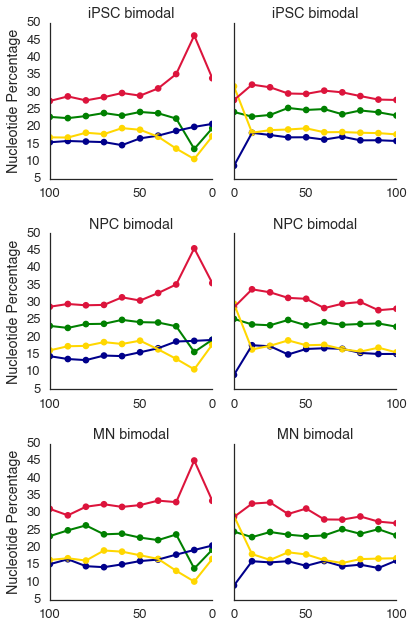

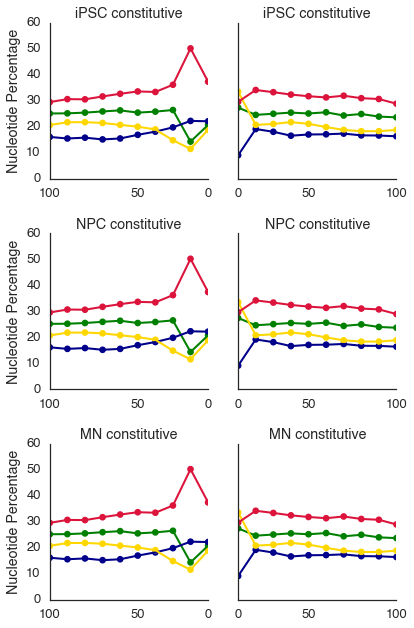

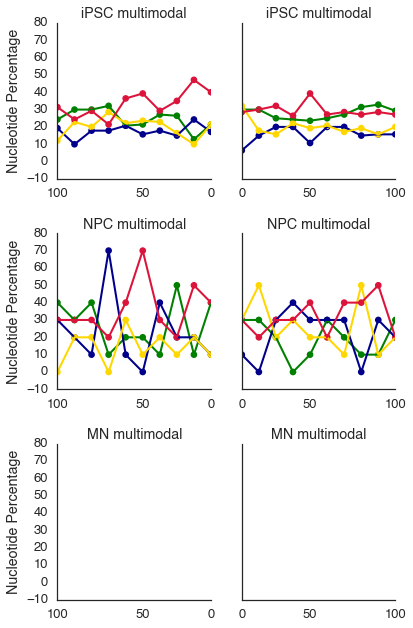

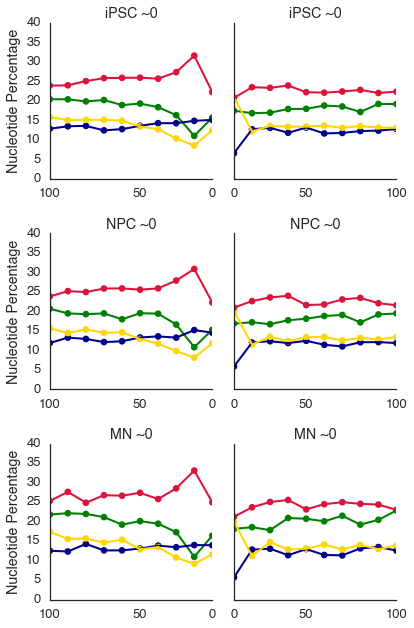

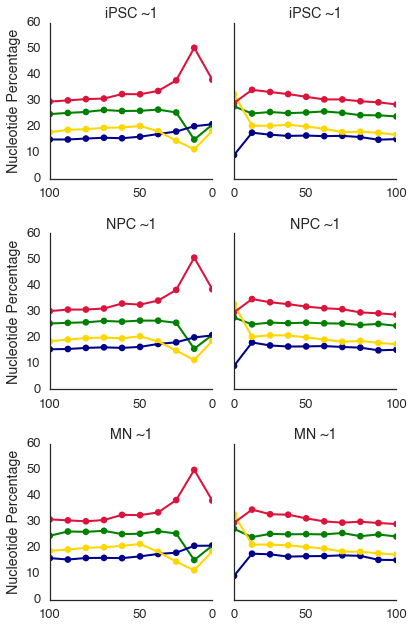

In [64]:
nucleotide_to_color = {'A': 'Green',
                       'C': 'DarkBlue',
                       'G': 'Gold', 
                       'T': 'Crimson'}
nucleotide_order = list('ACGT')
nucleotide_palette = [nucleotide_to_color[x] for x in nucleotide_order]

for modality, modality_df in nucleotide_content_all.groupby('modality'):

    g = sns.FacetGrid(modality_df, hue='Nucleotide', row='phenotype', col='Region', 
                      palette=nucleotide_palette, hue_order=nucleotide_order,
#                       palette=modality_palette, hue_order=modality_order, 
                      row_order=study.phenotype_order,
                     col_order=['Upstream', 'Downstream'], sharex=False)

    g.map(sns.pointplot, 'window_relative_to_exon', 'Nucleotide Percentage', scale=0.5, dodge=True, ci=None)
    g.set_titles('{row_name} ' + modality)
    for ax in g.axes.flat:
        if ax.is_first_col():
            ax.invert_xaxis()
    g.set(xlabel='')
    g.set(xticks=[0, 19, 39], xticklabels=[0, 200, 400])
    g.fig.tight_layout()
    g.savefig('{}/intron_window_nucleotide_content_{}.pdf'.format(figure_folder, modality))
    
    
    # Zoom in on first 100nt
    g.set(xlim=(0, 9), xticks=[0, 4, 9], xticklabels=[0, 50, 100])
    for ax in g.axes.flat:
        if ax.is_first_col():
            ax.invert_xaxis()
    g.savefig('{}/intron_window_nucleotide_content_{}_zoom100nt.pdf'.format(figure_folder, modality))
